# Exploratory Data Analysis

In [31]:
# Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


### Read Merged Bike Data and Weather Data CSV

In [32]:
# Set Filepath for Merged Data CSV

filepath = Path('../output/merged_weather_bike_data.csv')

# Read Chicago BikeShare Weather CSV Data

complete_bike_weather_data = pd.read_csv(filepath)

display(complete_bike_weather_data)

# segment data by year

year_data_2020 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2020, :]
year_data_2021 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2021, :]
year_data_2022 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2022, :]
year_data_2023 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2023, :]


,ride_id,started_at,start_day,start_hour,start_month,start_year,trip_length,start_station_name,member_casual,rideable_type,...,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,clouds_all,weather_id,weather_main,weather_description
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0,4,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,...,4.02,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0,4,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,...,4.02,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0,4,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,...,4.02,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0,4,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,...,4.02,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0,4,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,...,4.02,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813892,6D855DB843848DB3,2023-11-30 23:16:11,2023-11-30,23,11,2023,0 days 00:10:14,Canal St & Adams St,member,classic_bike,...,7.81,1012,92,4.92,183,7.6,100,500,Rain,light rain
9813893,447027EB102601BE,2023-11-30 23:02:56,2023-11-30,23,11,2023,0 days 00:21:13,Lincoln Ave & Fullerton Ave,casual,electric_bike,...,7.81,1012,92,4.92,183,7.6,100,500,Rain,light rain
9813894,993257B9E439A2DD,2023-11-30 23:53:54,2023-11-30,23,11,2023,0 days 00:09:21,Wentworth Ave & Cermak Rd*,member,classic_bike,...,7.81,1012,92,4.92,183,7.6,100,500,Rain,light rain
9813895,9B518D5122FD7D72,2023-11-30 23:53:34,2023-11-30,23,11,2023,0 days 00:09:43,Wentworth Ave & Cermak Rd*,member,classic_bike,...,7.81,1012,92,4.92,183,7.6,100,500,Rain,light rain


### Read Weather data to use as control

In [33]:
# Set Filepath for Merged Data CSV

weather_filepath = Path('../data/chicago_weather_data_2020_2023_Celcius.csv')

# Read Weather CSV Data

weather_data = pd.read_csv(weather_filepath)

weather_data

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1577836800,2020-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.08,10000.0,-5.63,-9.08,...,0.00,NaN,NaN,NaN,NaN,95,804,Clouds,overcast clouds,04n
1,1577840400,2020-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.99,10000.0,-5.23,-8.99,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,1577844000,2020-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.87,10000.0,-4.96,-8.87,...,0.00,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1577847600,2020-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.90,10000.0,-4.55,-8.90,...,0.00,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1577851200,2020-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.18,10000.0,-4.67,-9.18,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,600,Snow,light snow,13d
37239,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,701,Mist,mist,50d
37240,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,500,Rain,light rain,10d
37241,1704063600,2023-12-31 23:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.43,6437.0,-1.17,-4.81,...,7.60,NaN,NaN,0.11,NaN,100,600,Snow,light snow,13n


## Usage Trends:
### 1.1. How does the total number of rides vary under different weather conditions (e.g., clear, rainy,snowy)?     (Sean)

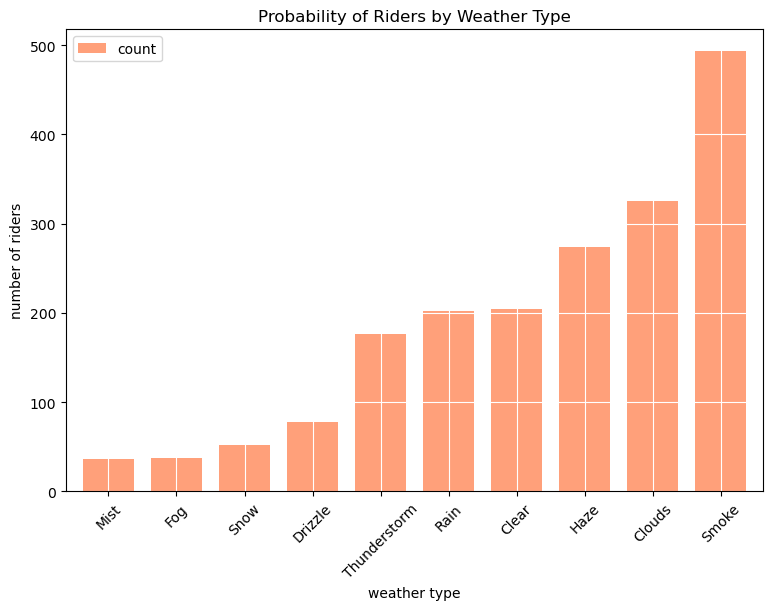

In [34]:
# Define Function for Ride by Weather Calculation consider Weather Probability Bias

def rides_by_weather(x):

    # Value Count Ride Share Data by Weather Type

    rides_by_weather = x['weather_main'].value_counts()

    # Weather Data Weather Type Baseline Probability

    weather_occurrences = weather_data['weather_main'].value_counts()
    total_weather_samples = weather_occurrences.sum()
    weather_probabilities = weather_occurrences / total_weather_samples

    # Calculate conditional probability of riding given weather (P(ride | weather))

    conditional_rider_probabilities = rides_by_weather / weather_occurrences
    conditional_rider_probabilities = conditional_rider_probabilities.sort_values()

    # Remove Bad Data and Display Data

    conditional_rider_probabilities = conditional_rider_probabilities.dropna(how='any')
    
    # display(pd.DataFrame(conditional_rider_probabilities))
    
    return conditional_rider_probabilities

def display_bar(x, y):
    
    # Combine data into a single DataFrame
    
    combined_df = pd.DataFrame(x)
    
    # Display and format as Chart

    combined_df.plot(kind='bar', figsize=(9,6), width=0.75, color = ['lightsalmon', 'silver', 'darkorange', 'grey'])
    plt.title(f'Probability of Riders by Weather Type{y}')
    plt.xlabel('weather type')
    plt.ylabel('number of riders')
    plt.xticks(rotation=45)
    plt.grid(color='white')
    
    plt.savefig(f'../output/Probability of Riders by Weather Type{y}')
    
    plt.show()


# Calculate and Display Rider Probability by Weather Type

display_bar(rides_by_weather(complete_bike_weather_data),"")


#### Analysis
In this chart, we have adjusted  for the rider probability counts by normalizing the data by how often each weather condition has occurred over the four years. Interestingly, "Smoke" saw the highest ridership count per instance (~493 rides), which was followed by "Clouds" (~326), "Haze" (~274), and only then finally "Clear" (~204). What also interesting is tha the clear set, adverse weather conditions, such as "Rain" (~202) and "Thunderstorm" (~177), showed moderate ridership, while conditions such as "Mist," "Fog," and "Snow" had significantly lower averages.

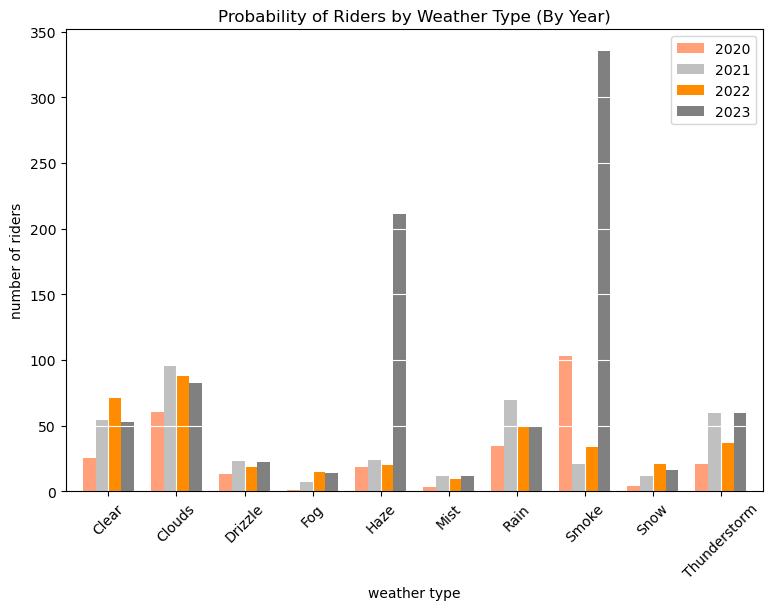

In [35]:
# Define loop Lists

years = [2020, 2021, 2022, 2023]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022, year_data_2023] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Year)")

#### Analysis
In this chart, we decide to further segment down the data by year (2020–2023) to examine whether specific years contributed to the potential anomalies in rider probabilities. Though, stable weather types like "Clouds" (~60–95 rides annually) showed consistent ridership probabilities across all years, "Smoke" (~335 rides) and "Haze" (~211 rides) seem to show a significant spike in 2023 , likely driven by the 2023 canadian wildfire issues.

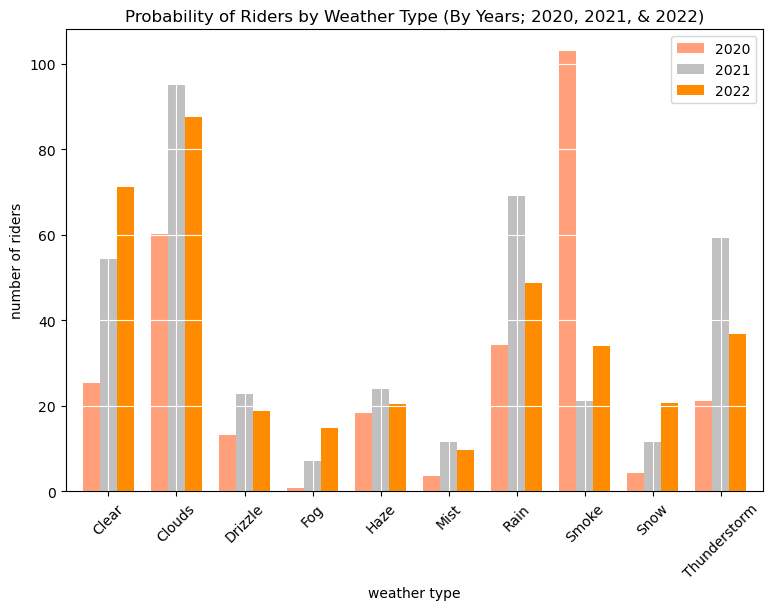

In [36]:
# Define loop Lists WITHOUT 2023

years = [2020, 2021, 2022]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Years; 2020, 2021, & 2022)")

#### Analysis
This final chart focuses on 2020–2022, excluding 2023 to ensure better clarity for actionable insights. Looking at this chart, it’s clear that "Clouds" (~60–95 rides) and "Clear" (~25–71 rides) remained generally consistently dominant across all three years, while "Smoke" still depicted higher variability and was overall less significant (~21–103 rides). This highlights that ridership trends in stable weather conditions like "Clouds" and "Clear" are statistically considered more reliable for predicting bike demand, whereas weather-specific anomalies like the wildfire-driven "Smoke" data in 2023 are clear outliers that distort their data's long-term patterns.

### Are there noticeable patterns in ridership across temperature ranges (e.g., below freezing, mild, or hot)?      (SEAN)

In [37]:
# Define temperature bins and labels

temp_bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
temp_labels = ['Below Freezing', 'Cold', 'Mild', 'Warm', 'Hot']

# Add a column for temperature categories

complete_bike_weather_data['temp_category'] = pd.cut(complete_bike_weather_data['temp'], bins=temp_bins, labels=temp_labels)

complete_bike_weather_data

,ride_id,started_at,start_day,start_hour,start_month,start_year,trip_length,start_station_name,member_casual,rideable_type,...,pressure,humidity,wind_speed,wind_deg,wind_gust,clouds_all,weather_id,weather_main,weather_description,temp_category
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0,4,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,...,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds,Cold
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0,4,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,...,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds,Cold
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0,4,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,...,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds,Cold
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0,4,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,...,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds,Cold
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0,4,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,...,1018,86,6.70,350,0.0,100,804,Clouds,overcast clouds,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813892,6D855DB843848DB3,2023-11-30 23:16:11,2023-11-30,23,11,2023,0 days 00:10:14,Canal St & Adams St,member,classic_bike,...,1012,92,4.92,183,7.6,100,500,Rain,light rain,Cold
9813893,447027EB102601BE,2023-11-30 23:02:56,2023-11-30,23,11,2023,0 days 00:21:13,Lincoln Ave & Fullerton Ave,casual,electric_bike,...,1012,92,4.92,183,7.6,100,500,Rain,light rain,Cold
9813894,993257B9E439A2DD,2023-11-30 23:53:54,2023-11-30,23,11,2023,0 days 00:09:21,Wentworth Ave & Cermak Rd*,member,classic_bike,...,1012,92,4.92,183,7.6,100,500,Rain,light rain,Cold
9813895,9B518D5122FD7D72,2023-11-30 23:53:34,2023-11-30,23,11,2023,0 days 00:09:43,Wentworth Ave & Cermak Rd*,member,classic_bike,...,1012,92,4.92,183,7.6,100,500,Rain,light rain,Cold


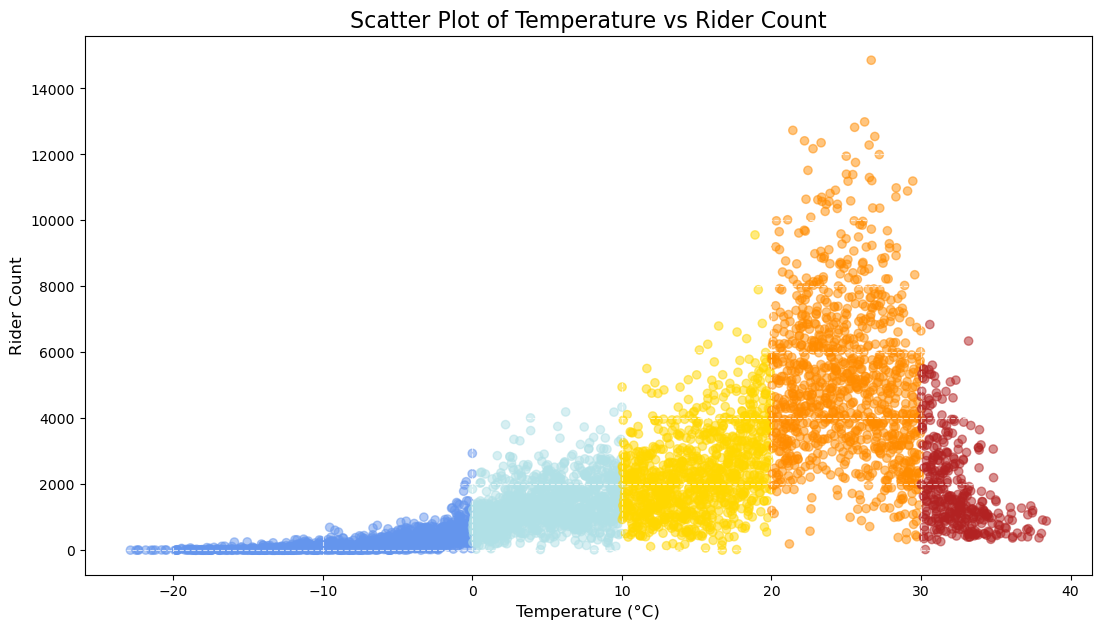

In [38]:
# Count riders by temperature and define color category

rider_count_by_temp = complete_bike_weather_data.groupby('temp').size().reset_index(name='count')

rider_count_by_temp['temp_category'] = pd.cut(rider_count_by_temp['temp'], bins=temp_bins, labels=temp_labels)

# Create Color Map and add it to the working data frame

temp_color_map = {
    'Below Freezing': 'cornflowerblue',
    'Cold': 'powderblue',
    'Mild': 'gold',
    'Warm': 'darkorange',
    'Hot': 'firebrick'
}

rider_count_by_temp['color'] = rider_count_by_temp['temp_category'].map(temp_color_map)

# Create a Scatter plot of Rider Count by temperature

plt.figure(figsize=(13, 7))
plt.scatter(rider_count_by_temp['temp'], rider_count_by_temp['count'], color=rider_count_by_temp['color'], alpha=0.5)

# Scatter Plot Formatting

plt.title('Scatter Plot of Temperature vs Rider Count', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rider Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# show plot and save the fig

plt.savefig('../output/Scatter Plot of Temperature vs Rider Count')

plt.show()


## Most Used Rideable Types by Year (Lovecy)

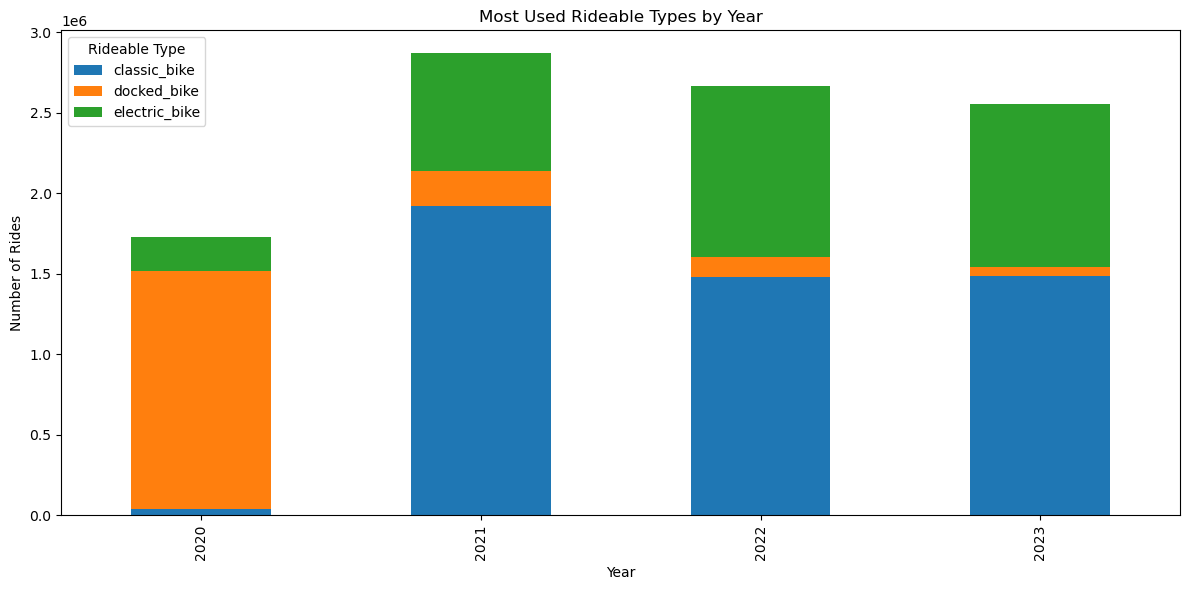

In [39]:
# Group by year and rideable type
rideable_counts = complete_bike_weather_data.groupby(['start_year', 'rideable_type']).size().reset_index(name='count')

# Pivot the data for better visualization
rideable_pivot = rideable_counts.pivot(index='start_year', columns='rideable_type', values='count')

# Plot the data
rideable_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Most Used Rideable Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()

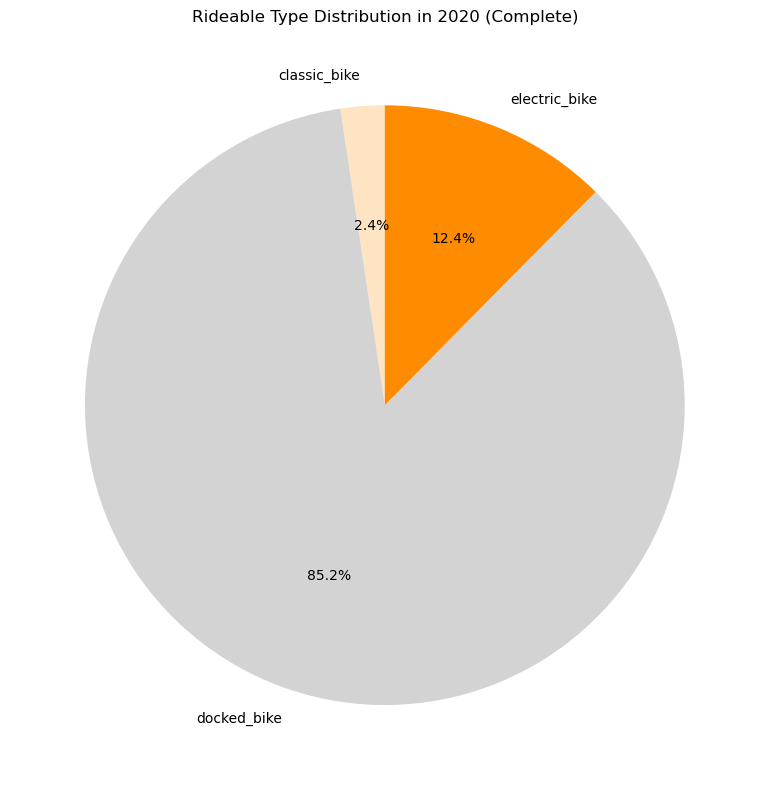

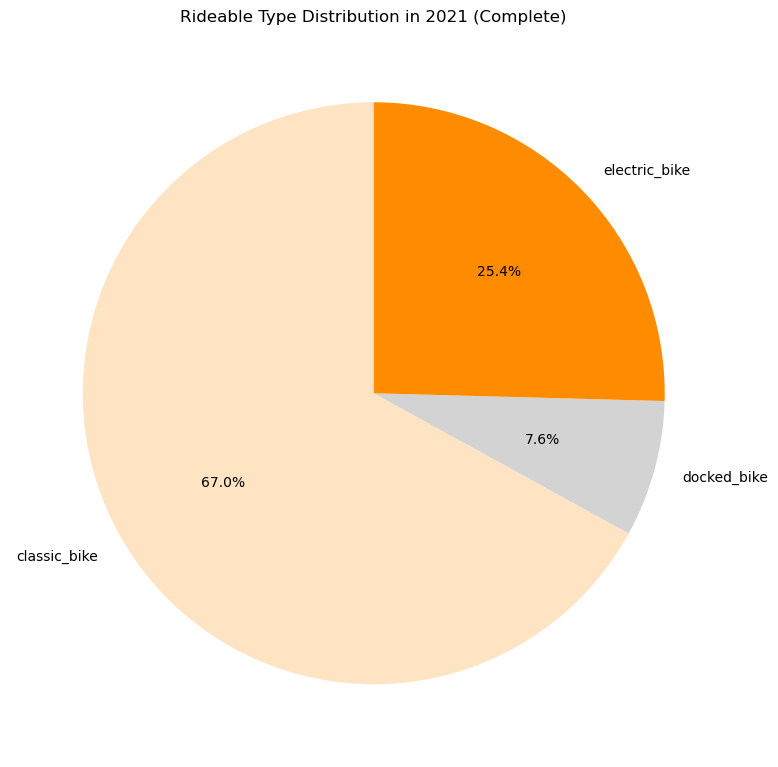

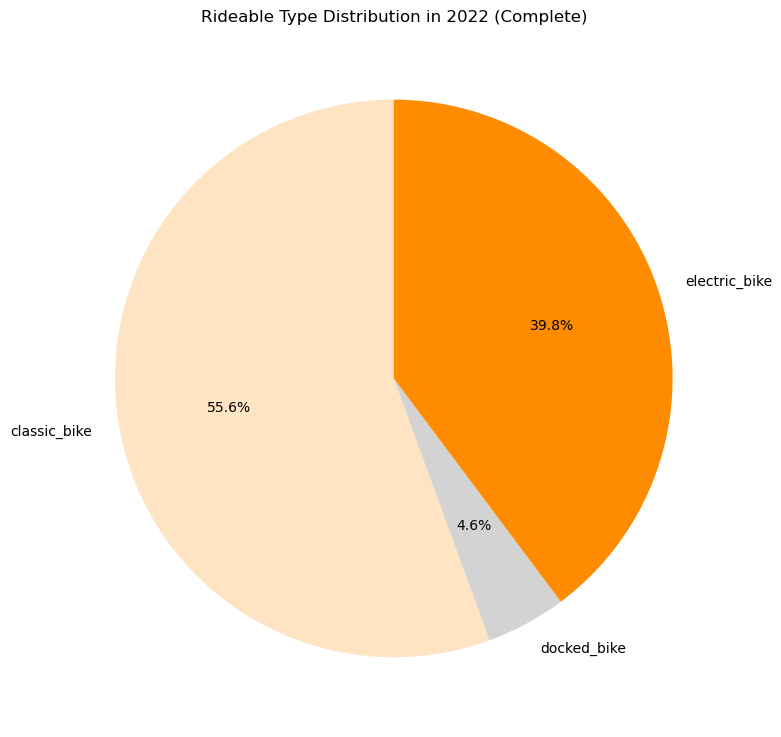

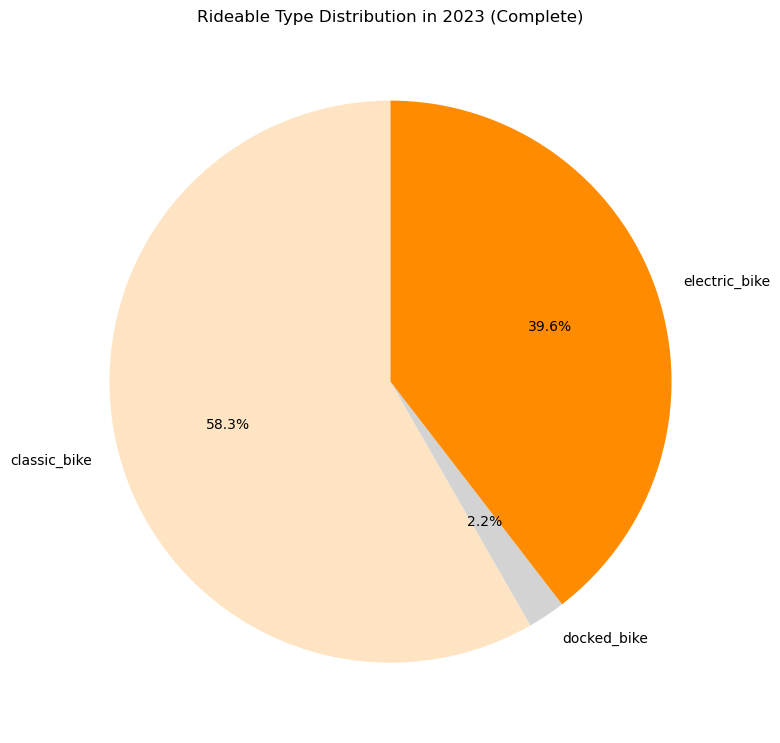

In [40]:
# Define function

def plot_rideable_type_distribution(data, user_type):

    # Group by year and rideable type
    rideable_counts = data.groupby(['start_year', 'rideable_type']).size().reset_index(name='count')

    # Pivot the data for easier processing
    rideable_pivot = rideable_counts.pivot(index='start_year', columns='rideable_type', values='count')

    # Plot pie charts for each year
    for year in rideable_pivot.index:
        plt.figure(figsize=(8, 8))
        rideable_pivot.loc[year].plot(
            kind='pie', 
            autopct='%1.1f%%', 
            startangle=90, 
            labels=rideable_pivot.columns,
            colors=['bisque', 'lightgrey', 'darkorange']
        )
        plt.title(f'Rideable Type Distribution in {year} {user_type}')
        plt.ylabel('')
        plt.tight_layout()
        plt.savefig(f'../output/Rideable Type Distribution {user_type} {year}.png')
        plt.show()


plot_rideable_type_distribution(complete_bike_weather_data, '(Complete)')


ANALYSIS
•	The decline in docked bikes suggests a shift away from the more traditional bike-sharing model towards flexible options.
•	Classic bikes have remained popular, though their market share has stabilized after a major increase in 2021.
•	Electric bikes have seen the most significant growth, and their popularity is expected to continue to rise due to their convenience and efficiency, especially in urban areas.



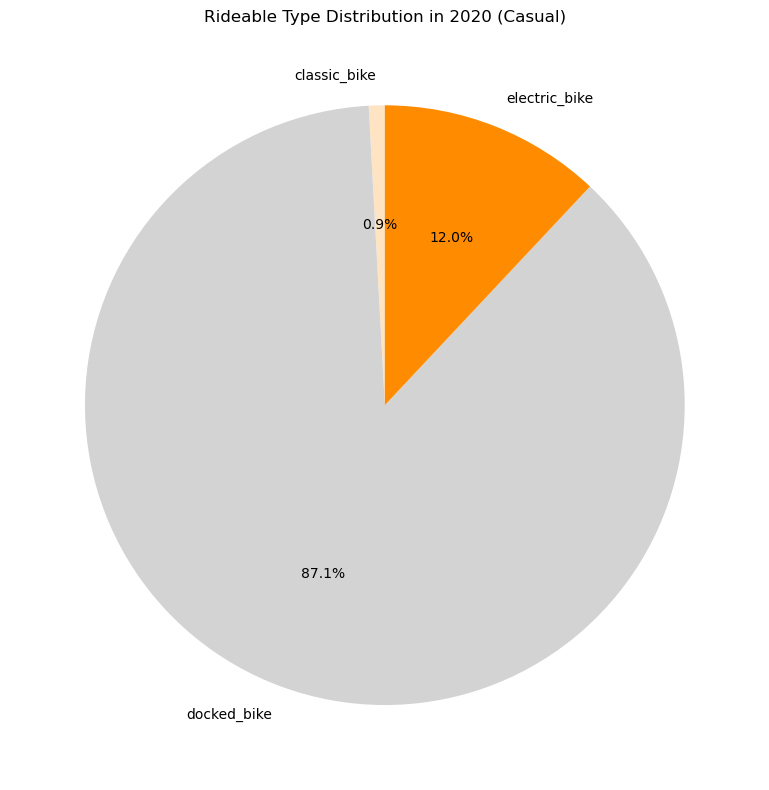

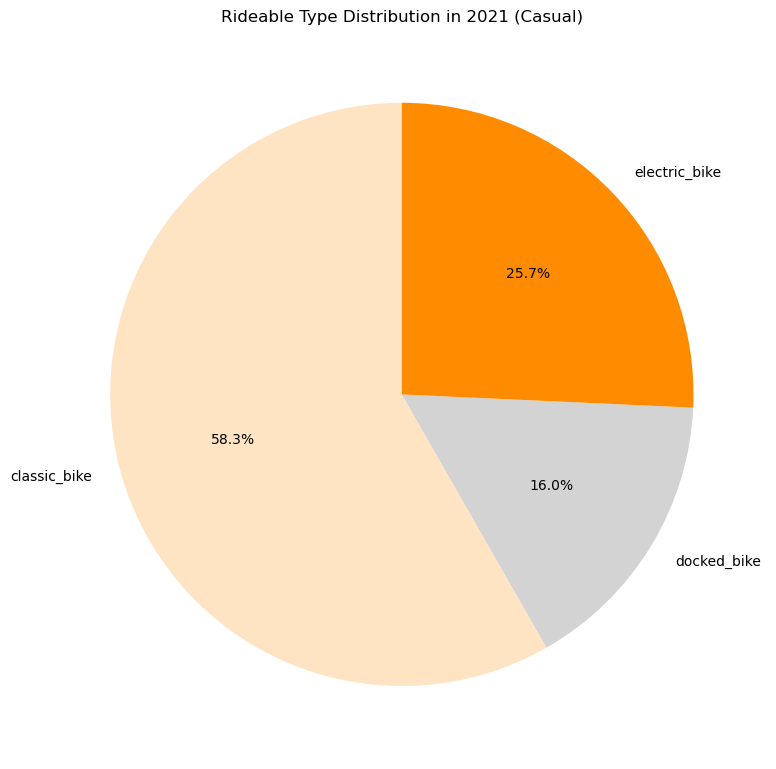

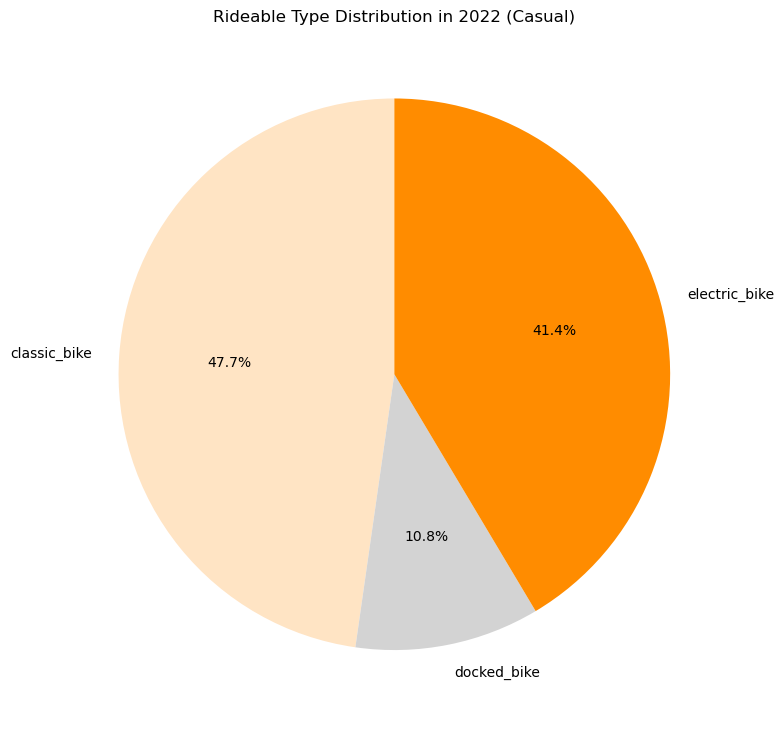

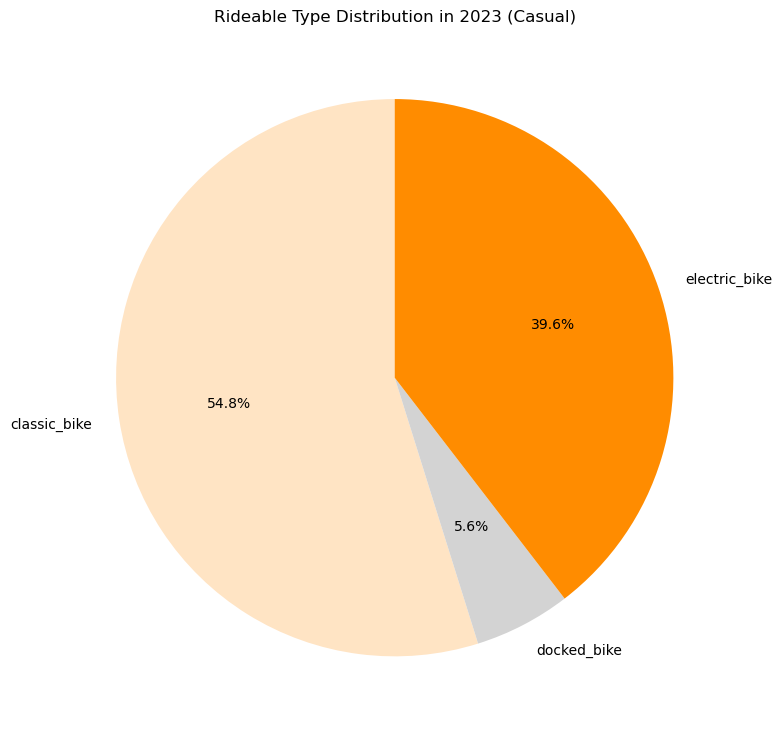

In [41]:
# Split Data by User Type Casual and run rideable type distribution function

casual_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'casual', :]
member_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'member', :]

plot_rideable_type_distribution(casual_user_complete, '(Casual)')

ANALYSIS - Casual users have shifted from relying on docked bikes to increasingly prefer classic bikes and electric bikes over the past few years. This trend suggests a preference for flexibility and convenience, particularly as electric bikes become a more prominent option. The growth in e-bike usage reflects broader trends in urban mobility and suggests that bike-sharing systems may continue to evolve towards these more user-friendly, flexible models

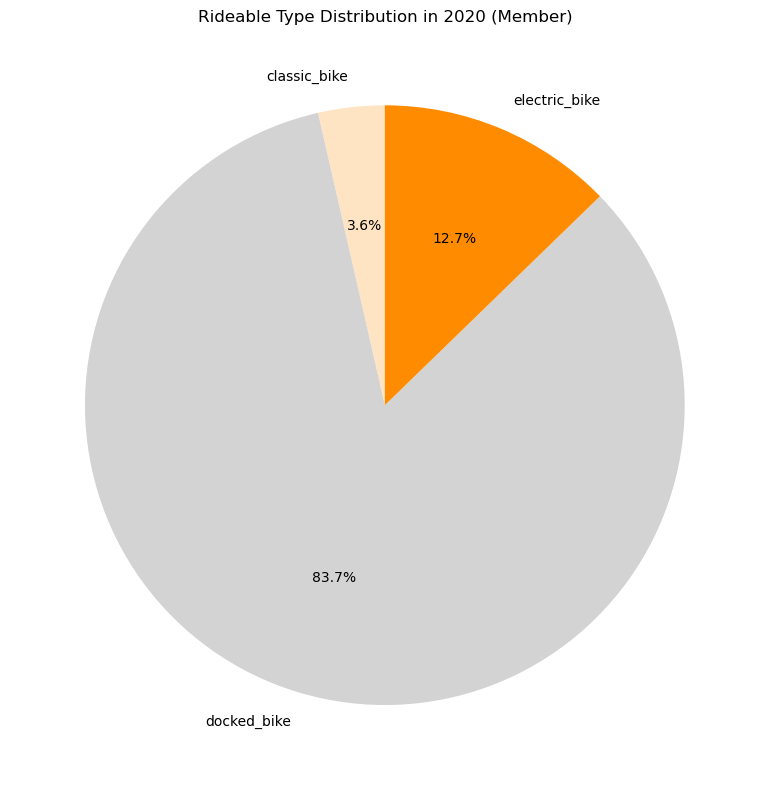

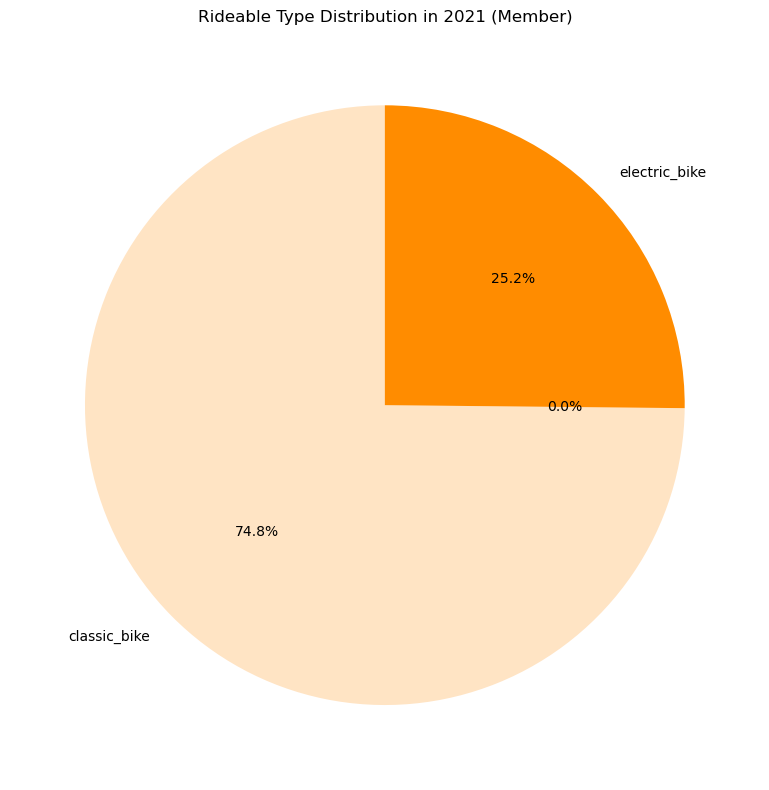

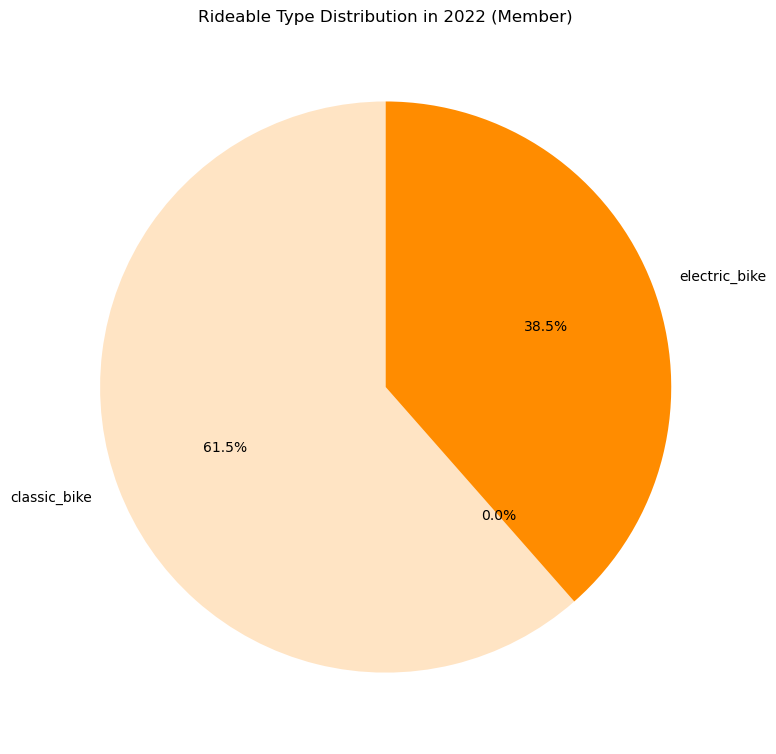

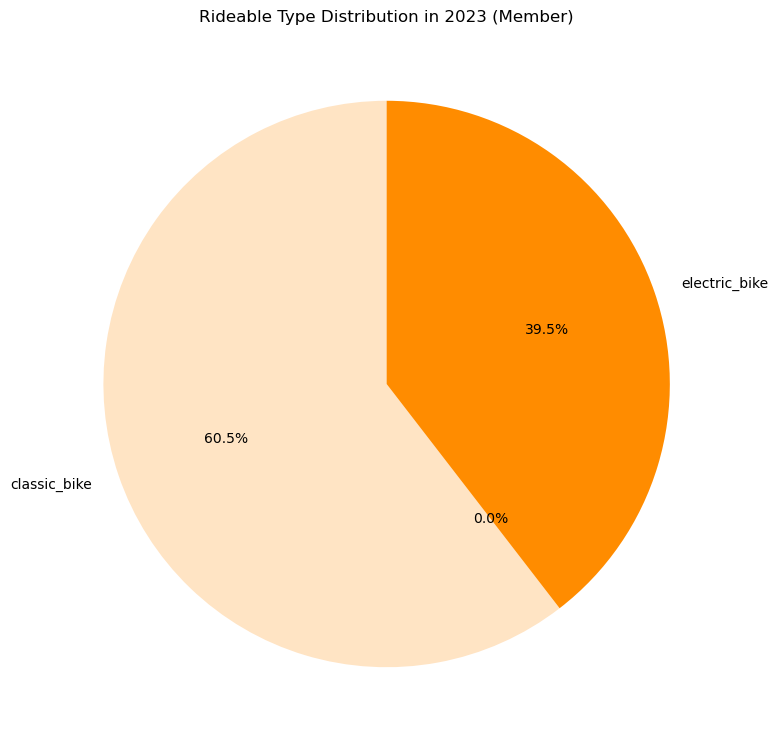

In [42]:
# Split Data by User Type Member and run rideable type distribution function

member_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'member', :]

plot_rideable_type_distribution(member_user_complete, '(Member)')

For member users, the data shows a significant shift from docked bikes to both classic bikes and electric bikes between 2020 and 2023. The disappearance of docked bikes and the increase in e-bike usage indicate that members increasingly prefer flexible, easy-to-use, and faster modes of transportation. The sustained use of classic bikes alongside the rise in e-bike adoption suggests that members value both traditional and modern bike-sharing options, depending on their needs.

## Average Hourly Rides by Weather Condition (Jitesh)

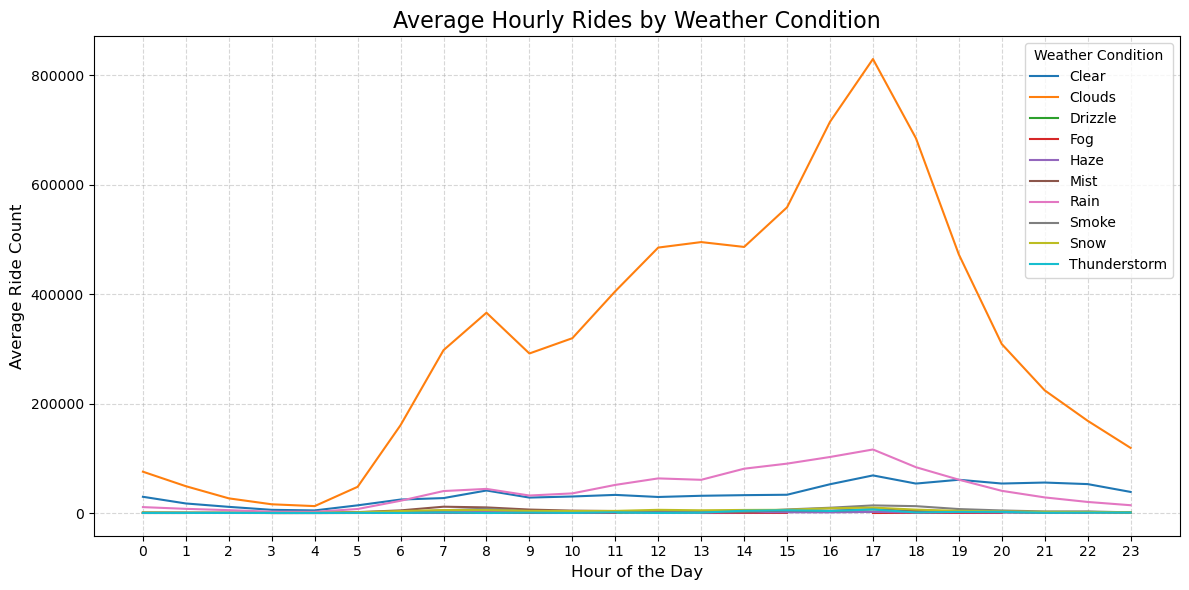

In [43]:
# Group data by 'start_hour' and 'weather_main', then calculate the average rides
hourly_weather = complete_bike_weather_data.groupby(['start_hour', 'weather_main']).agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
hourly_weather.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Pivot the data for plotting          
pivot_data = hourly_weather.pivot(index='start_hour', columns='weather_main', values='ride_count')

# Plot the line chart
plt.figure(figsize=(12, 6))
for weather in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[weather], label=weather)

# Adding labels, title, and legend
plt.title('Average Hourly Rides by Weather Condition', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0, 24))  # Show all hours
plt.legend(title="Weather Condition")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

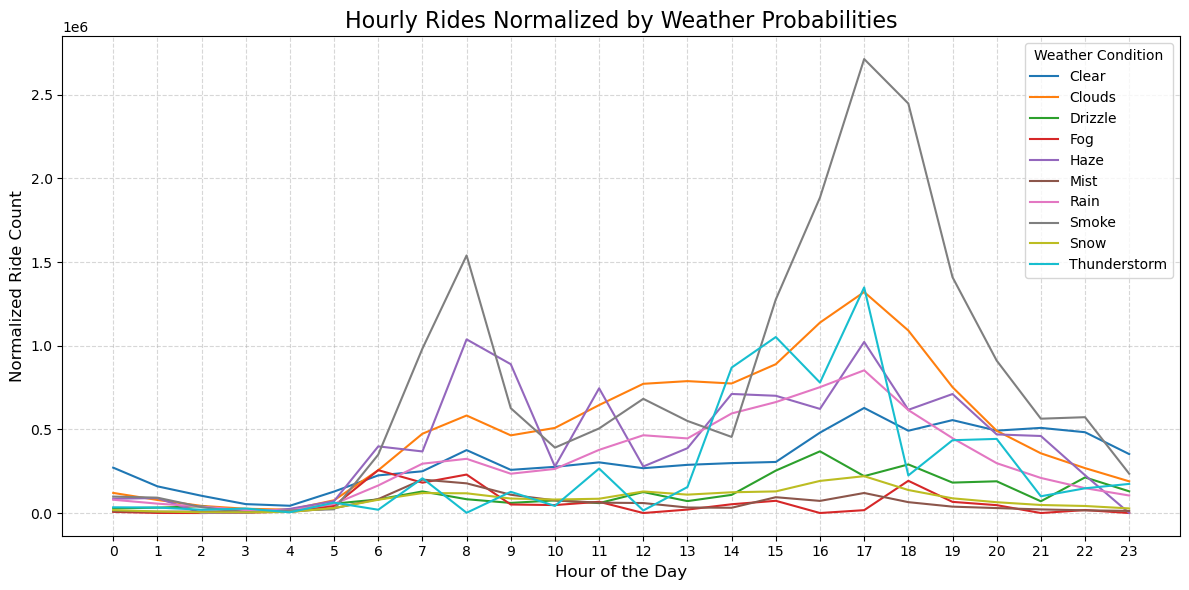

In [44]:
# Calculate probabilities of each weather type
weather_probs = weather_data['weather_main'].value_counts(normalize=True)

# Map probabilities back to the dataset
complete_bike_weather_data['weather_prob'] = complete_bike_weather_data['weather_main'].map(weather_probs)

# Fill missing probabilities with a small value to avoid division errors
complete_bike_weather_data['weather_prob'] = complete_bike_weather_data['weather_prob']

# Group by 'start_hour' and 'weather_main', and calculate total ride counts
hourly_weather = complete_bike_weather_data.groupby(['start_hour', 'weather_main']).size().reset_index(name='ride_count')

# Normalize ride counts by weather probabilities
hourly_weather['normalized_ride_count'] = hourly_weather['ride_count'] / hourly_weather['weather_main'].map(weather_probs)

# Fill missing values in the normalized ride counts with 0
hourly_weather['normalized_ride_count'] = hourly_weather['normalized_ride_count'].fillna(0)

# Pivot the data for plotting          
pivot_data = hourly_weather.pivot(index='start_hour', columns='weather_main', values='normalized_ride_count').fillna(0)

# Plot each line in the data in a For loop
plt.figure(figsize=(12, 6))
for weather in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[weather], label=weather)

# Adding labels, title, and legend
plt.title('Hourly Rides Normalized by Weather Probabilities', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Normalized Ride Count', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title="Weather Condition")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Hourly Rides Normalized by Weather Probabilities')

plt.show()


## Monthly Ride Volume (Jitesh)

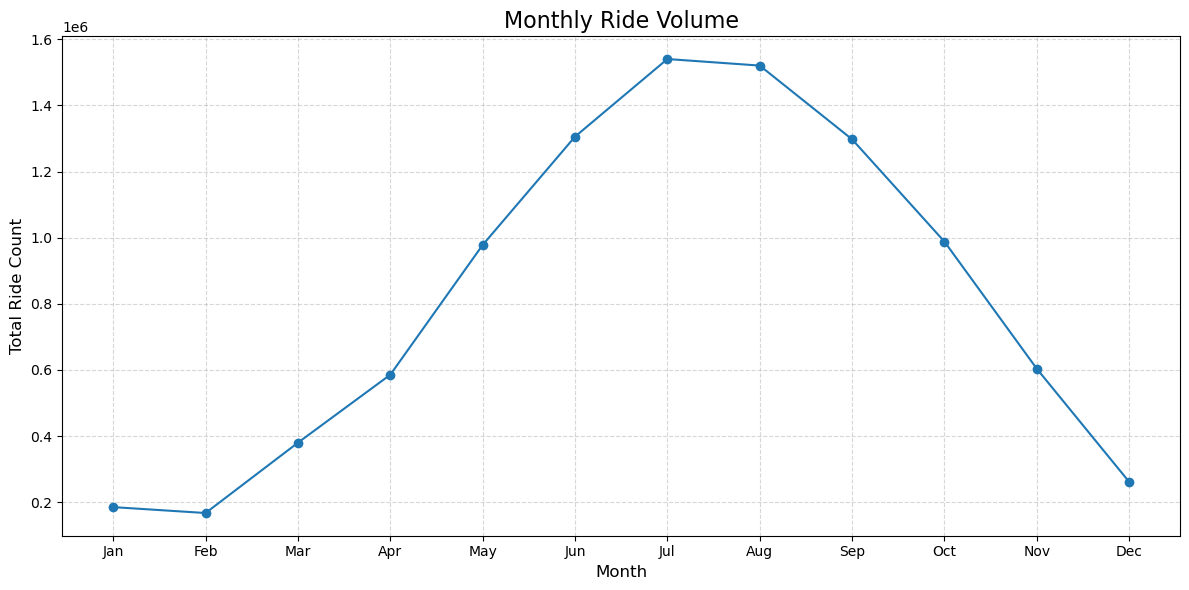

In [45]:

# Convert 'start_day' to datetime if it's not already
complete_bike_weather_data['start_day'] = pd.to_datetime(complete_bike_weather_data['start_day'])

# Extract the month from the 'start_day' column
complete_bike_weather_data['start_month'] = complete_bike_weather_data['start_day'].dt.month

# Group by 'start_month' and sum the ride counts (using 'ride_id')
monthly_ride_volume = complete_bike_weather_data.groupby('start_month').agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
monthly_ride_volume.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_ride_volume['start_month'], monthly_ride_volume['ride_count'], marker='o')

# Adding labels, title, and grid
plt.title('Monthly Ride Volume', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ride Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

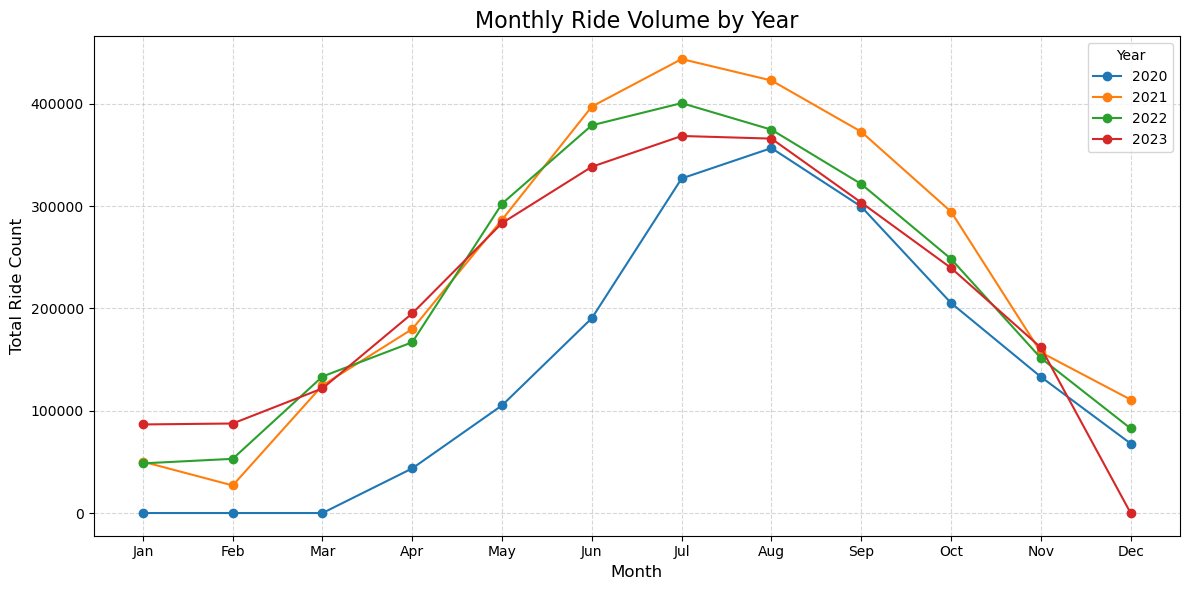

In [46]:
# Group by 'start_year' and 'start_month' and count rides
monthly_ride_volume = complete_bike_weather_data.groupby(['start_year', 'start_month']).agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
monthly_ride_volume.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Pivot the data for easier plotting (years as columns, months as rows)
pivot_data = monthly_ride_volume.pivot(index='start_month', columns='start_year', values='ride_count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], label=year, marker='o')

# Adding labels, title, and grid
plt.title('Monthly Ride Volume by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ride Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Monthly Ride Volume by Year')

plt.show()

## Top 10 Stations Under Clear and Adverse Weather (Jitesh)

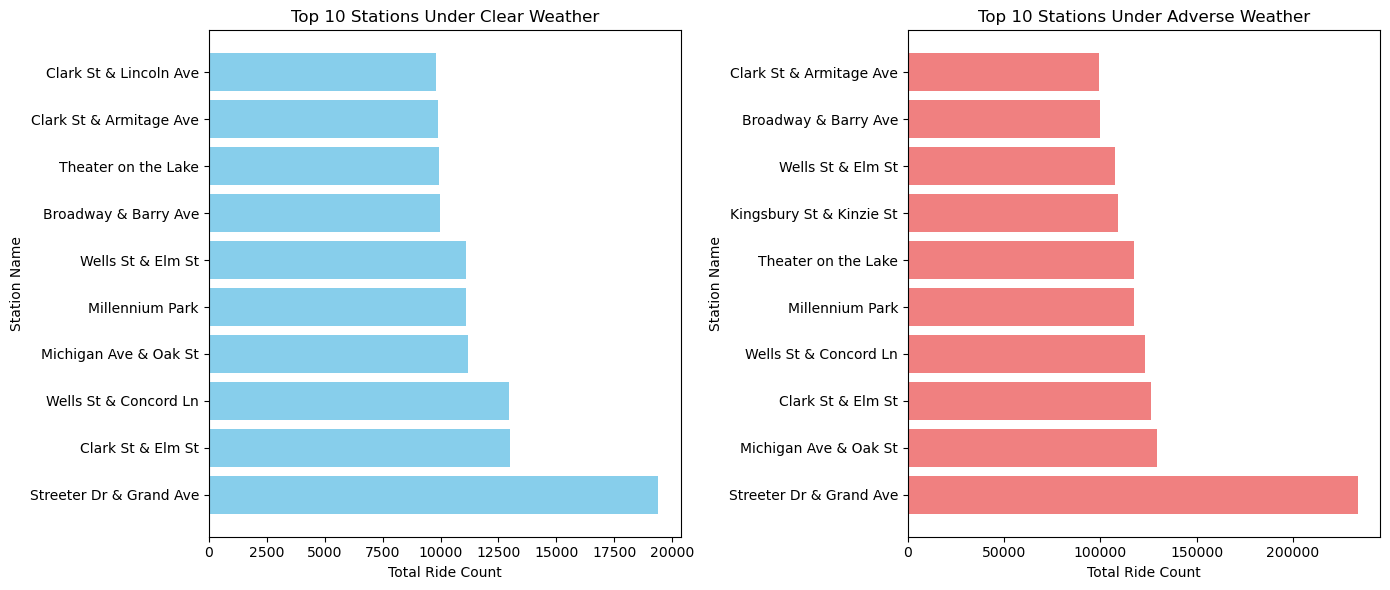

In [47]:
# Filter data into "clear" and "adverse" weather conditions
clear_weather = complete_bike_weather_data[complete_bike_weather_data['weather_main'] == 'Clear']
adverse_weather = complete_bike_weather_data[~complete_bike_weather_data['weather_main'].isin(['Clear'])]

# Group by station name and calculate the total ride count
clear_station_activity = clear_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()
adverse_station_activity = adverse_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()

# Sort the stations by ride count in descending order and take the top 10
top_10_clear_stations = clear_station_activity.sort_values(by='ride_id', ascending=False).head(10)
top_10_adverse_stations = adverse_station_activity.sort_values(by='ride_id', ascending=False).head(10)

# Plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Clear Weather
axes[0].barh(top_10_clear_stations['start_station_name'], top_10_clear_stations['ride_id'], color='skyblue')
axes[0].set_title('Top 10 Stations Under Clear Weather')
axes[0].set_xlabel('Total Ride Count')
axes[0].set_ylabel('Station Name')

# Plot for Adverse Weather
axes[1].barh(top_10_adverse_stations['start_station_name'], top_10_adverse_stations['ride_id'], color='lightcoral')
axes[1].set_title('Top 10 Stations Under Adverse Weather')
axes[1].set_xlabel('Total Ride Count')
axes[1].set_ylabel('Station Name')

# Adjust layout
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Top 10 Stations Under Clear and Adverse Weather')

plt.show()

## Rider Type Breakdown by Weather Condition (Normalized) (Jitesh)

<Figure size 1000x600 with 0 Axes>

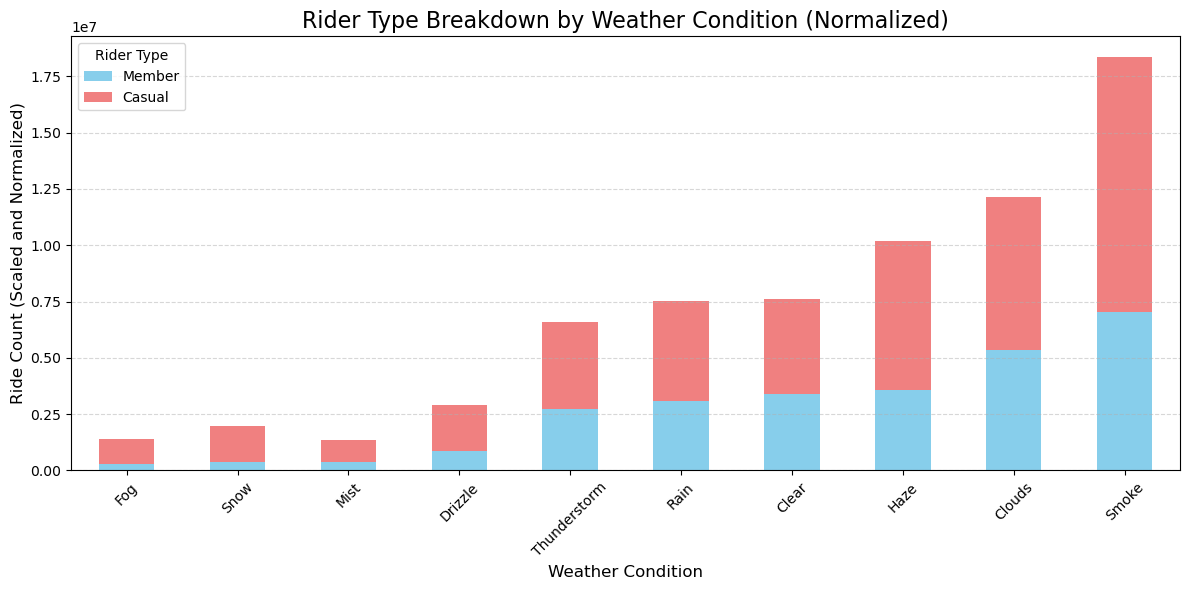

In [48]:
# Group data by 'weather_main' and 'member_casual', then count the rides
rider_type_by_weather = complete_bike_weather_data.groupby(['weather_main', 'member_casual']).agg({'ride_id': 'count'}).reset_index()

# Normalize the ride counts by weather probabilities
rider_type_by_weather['normalized_ride_count'] = rider_type_by_weather['ride_id'] / rider_type_by_weather['weather_main'].map(weather_probs)

# Pivot the normalized data so that 'member_casual' values become columns and sort it
pivot_rider_type = rider_type_by_weather.pivot(index='weather_main', columns='member_casual', values='normalized_ride_count')
pivot_rider_type = pivot_rider_type.sort_values(['casual', 'member'])

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_rider_type.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(12, 6))

# Adding labels, title, and legend
plt.title('Rider Type Breakdown by Weather Condition (Normalized)', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Ride Count (Scaled and Normalized)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rider Type', labels=['Member', 'Casual'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot and save fig
plt.tight_layout()

plt.savefig(f'../output/Rider Type Breakdown by Weather Condition (Normalized)')

plt.show()

## Hourly Ride Trends by Rider Type and Bike Type (Jitesh)

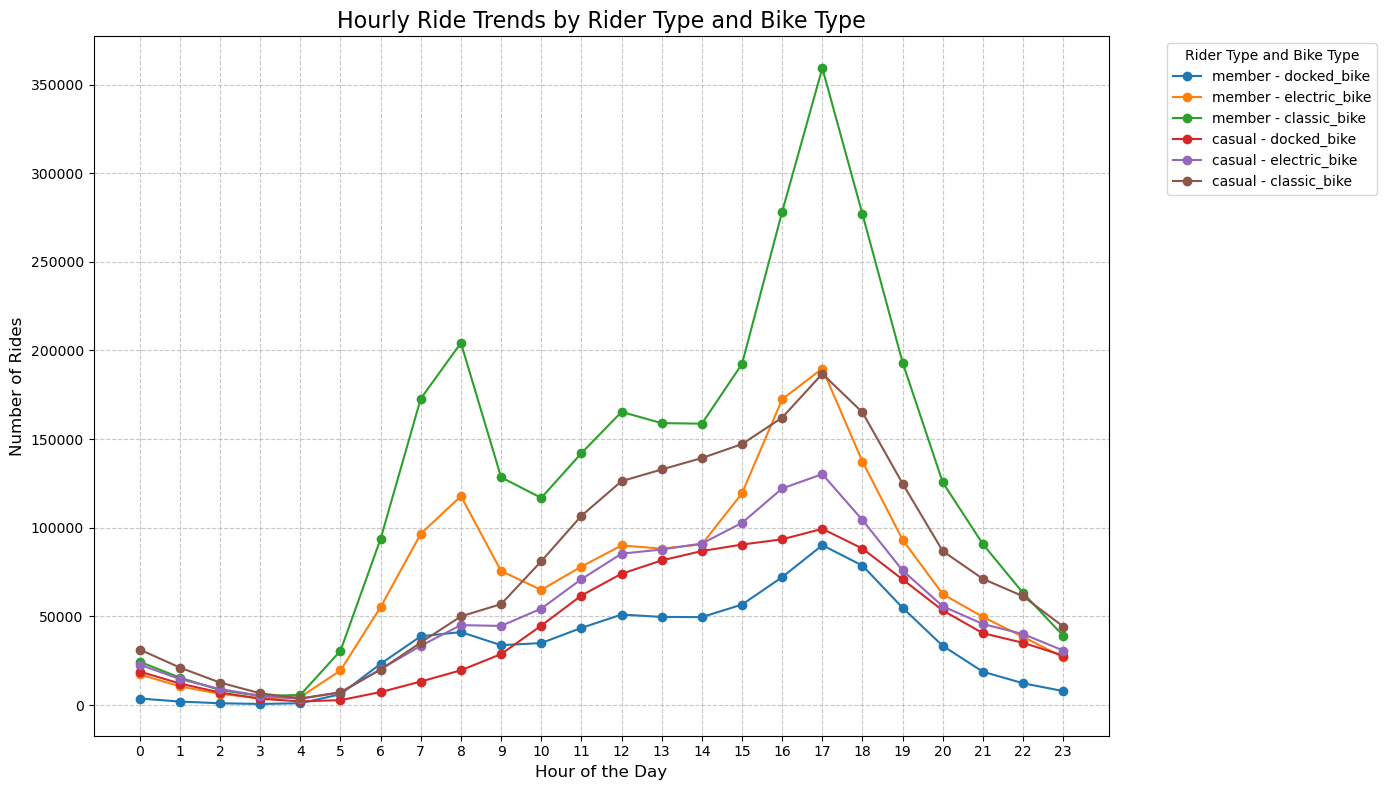

In [49]:
# Group by start_hour, member_casual, and rideable_type to get ride counts
hourly_trends = complete_bike_weather_data.groupby(['start_hour', 'member_casual', 'rideable_type']).size().reset_index(name='ride_count')

# Pivot data to have start_hour as index and columns for member_casual and rideable_type
pivot_data = hourly_trends.pivot_table(index='start_hour', columns=['member_casual', 'rideable_type'], values='ride_count', aggfunc='sum')

# Plotting the line chart
plt.figure(figsize=(14, 8))

# Plot trends for each rider type and rideable type
for rider_type in ['member', 'casual']:
    for rideable in complete_bike_weather_data['rideable_type'].unique():
        column_name = (rider_type, rideable)
        
        if column_name in pivot_data.columns:
            plt.plot(pivot_data.index, pivot_data[column_name], label=f'{rider_type} - {rideable}', marker='o')

# Add labels, title, and legend
plt.title('Hourly Ride Trends by Rider Type and Bike Type', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(range(0, 24))  # Assuming start_hour is in 24-hour format
plt.legend(title='Rider Type and Bike Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout and save fig
plt.tight_layout()

plt.savefig(f'../output/Hourly Ride Trends by Rider Type and Bike Type')

plt.show()

### Are there noticeable patterns in ridership across pressure ranges (e.g.Low pressure, High pressure)? (Lovecy)

,start_day,total_rides,avg_pressure
0,2020-04-01,1195,1019.275314
1,2020-04-02,1305,1021.095019
2,2020-04-03,1774,1016.505073
3,2020-04-04,1165,1021.024893
4,2020-04-05,1435,1023.326829
...,...,...,...
1332,2023-11-26,1125,1010.530667
1333,2023-11-27,3198,1017.620075
1334,2023-11-28,3591,1025.416597
1335,2023-11-29,4856,1013.420717


Correlation between pressure and bike usage: -0.15982607636106538
T-statistic: 5.675373785077928, P-value: 1.695332623938162e-08


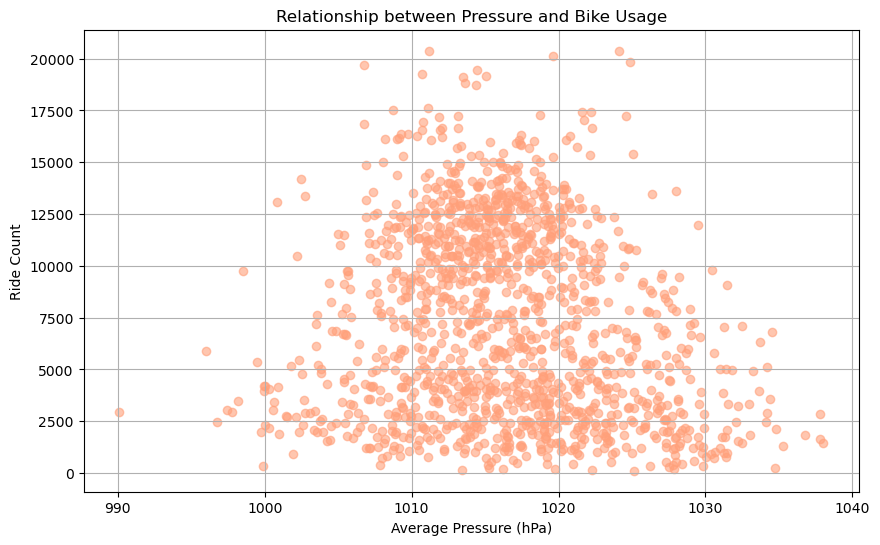

In [58]:
# Aggregate bike usage by date
bike_usage = complete_bike_weather_data.groupby('start_day').size().reset_index(name='total_rides')

# Calculate average pressure per day
pressure_data = complete_bike_weather_data.groupby('start_day')['pressure'].mean().reset_index(name='avg_pressure')

# Merge the two datasets
analysis_data = pd.merge(bike_usage, pressure_data, on='start_day')
display(analysis_data)

#Find the correlation between pressure_data and  bike_usage
correlation = analysis_data['avg_pressure'].corr(analysis_data['total_rides'])
print(f"Correlation between pressure and bike usage: {correlation}")

# Segmented correlation for casual riders
casual_data = complete_bike_weather_data[complete_bike_weather_data['member_casual'] == 'casual']
seg_analysis = casual_data.groupby('start_day').agg({'pressure': 'mean', 'rideable_type': 'count'}).reset_index()
seg_analysis.rename(columns={'pressure': 'avg_pressure', 'rideable_type': 'total_rides'}, inplace=True)

# Define two groups: low pressure vs high pressure
low_pressure = analysis_data [analysis_data['avg_pressure'] < analysis_data['avg_pressure'].median()]['total_rides']
high_pressure = analysis_data[analysis_data['avg_pressure'] >= analysis_data['avg_pressure'].median()]['total_rides']

# Perform t-test
t_stat, p_value = ttest_ind(low_pressure, high_pressure, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Scatter plot for pressure vs bike usage
plt.figure(figsize=(10, 6))
plt.scatter(analysis_data['avg_pressure'], analysis_data['total_rides'], alpha=0.6, c='lightsalmon')
plt.title('Relationship between Pressure and Bike Usage')
plt.xlabel('Average Pressure (hPa)')
plt.ylabel('Ride Count')
plt.grid(True)

plt.savefig(f'../output/Relationship between Pressure and Bike Usage')

plt.show()


ANALYSIS - The Pearson correlation coefficient is approximately -0.16, which suggests there is a weak negative correlation between atmospheric pressure and bike usage. It means as pressure increases, there is a slight tendency for bike usage to decrease.However, the correlation is not strong, so other factors likely contribute significantly to bike usage.
1.	Hypotheses:
o	H0: There is no difference in bike usage between low- and high-pressure days.
o	HA: There is a significant difference in bike usage between low- and high-pressure days.
2.	t-Statistic (5.67):
o	This large t-statistic suggests the difference in bike usage between the two groups is much greater.
3.	p-Value (1.69e-08):
o	The very small p-value provides evidence against H0,  confirming to reject the null hypothesis.
o	This indicates that atmospheric pressure (low vs. high) significantly impacts bike usage.



## ### Are there noticeable patterns in ridership across humidity ranges (low, medium, high)?   (Lovecy)

Correlation between humidity and bike usage: -0.3616945925279752


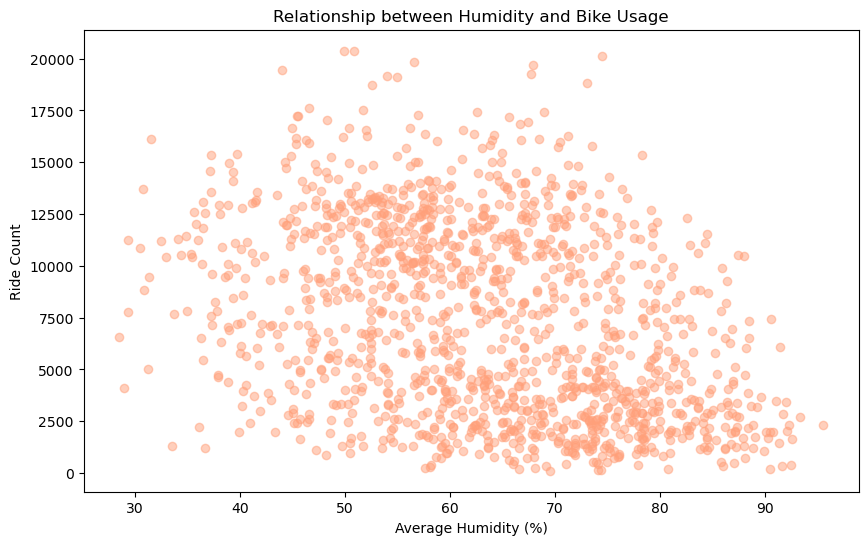

humidity_level
Low       9491.721311
Medium    8374.440821
High      5135.859375
Name: total_rides, dtype: float64
ANOVA F-statistic: 89.9906553200607, P-value: 2.1804968466732907e-37


/var/folders/pt/863lyd297bx33mrhwt8gcp0h0000gn/T/ipykernel_9269/2728798218.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(analysis_data.groupby('humidity_level')['total_rides'].mean())


In [64]:
# Aggregate bike rides by date
bike_usage = complete_bike_weather_data.groupby('start_day').size().reset_index(name='total_rides')

# Calculate average daily humidity
humidity_data = complete_bike_weather_data.groupby('start_day')['humidity'].mean().reset_index(name='avg_humidity')

# Merge datasets
analysis_data = pd.merge(bike_usage, humidity_data, on='start_day')

#Find the correlation between wind_speed_data and  bike_usage
analysis_data
correlation = analysis_data['avg_humidity'].corr(analysis_data['total_rides'])
print(f"Correlation between humidity and bike usage: {correlation}")

# Scatter plot for Humidity vs bike usage
plt.figure(figsize=(10, 6))
plt.scatter(analysis_data['avg_humidity'], analysis_data['total_rides'], alpha=0.5, color='lightsalmon')
plt.title('Relationship between Humidity and Bike Usage')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Ride Count')

plt.savefig(f'../output/Relationship between Humidity and Bike Usage')
plt.grid(True)
plt.show()

#Grouping the data using cut and bin
analysis_data['humidity_level'] = pd.cut(
    analysis_data['avg_humidity'],
    bins=[0, 40, 70, 100],
    labels=['Low', 'Medium', 'High']
)
print(analysis_data.groupby('humidity_level')['total_rides'].mean())


low_humidity = analysis_data[analysis_data['humidity_level'] == 'Low']['total_rides']
medium_humidity = analysis_data[analysis_data['humidity_level'] == 'Medium']['total_rides']
high_humidity = analysis_data[analysis_data['humidity_level'] == 'High']['total_rides']

#ANOVA Test
f_stat, p_value = f_oneway(low_humidity, medium_humidity, high_humidity)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


ANALYSIS - The correlation coefficient of -0.36 suggests that a moderate negative relationship exist between humidity and bike usage.
Components of ANNOVA Test - F-statistic: 89.99 is very large, indicating that the variation between the three humidity groups (Low, Medium, and High) is much larger than the variation within each group.
P-value: 2.18e-37 is an extremely small p-value. This suggest that the differences in bike usage between the Low, Medium, and High humidity groups are statistically significant.
Therefore, the average number of bike rides differs across the three humidity categories, and humidity plays a significant role in bike usage.

## ### Are there noticeable patterns in ridership across wind speed ranges (low, medium, high)?   (Lovecy)

Correlation between wind speed and bike usage: -0.3446805515371327


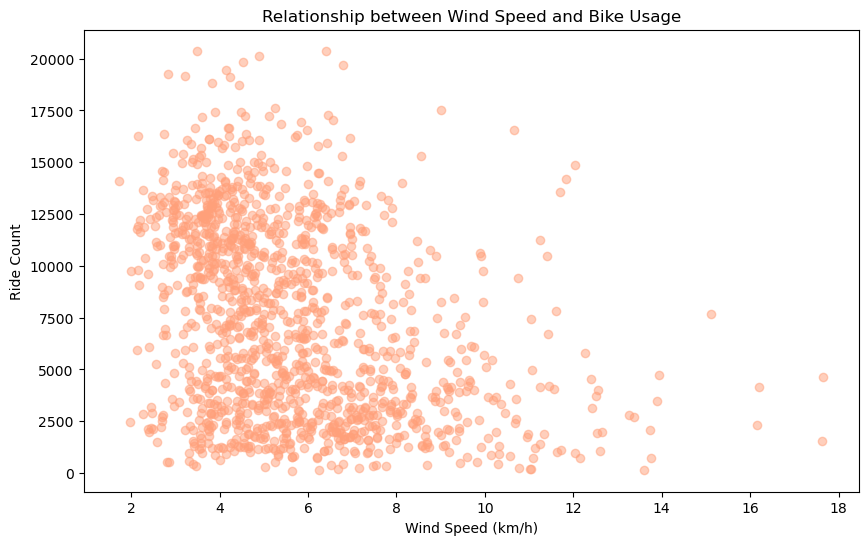

In [69]:
# Aggregate bike usage by date
bike_usage = complete_bike_weather_data.groupby('start_day').size().reset_index(name='total_rides')

# Calculate average wind speed per day
wind_speed_data = complete_bike_weather_data.groupby('start_day')['wind_speed'].mean().reset_index(name='avg_speed')

# Merge the two datasets
analysis_data = pd.merge(bike_usage, wind_speed_data, on='start_day')
analysis_data 

#Find the correlation between windspeed_data and  bike_usage
correlation = analysis_data['avg_speed'].corr(analysis_data['total_rides'])
print(f"Correlation between wind speed and bike usage: {correlation}")

# Scatter plot for wind speed vs bike usage
plt.figure(figsize=(10, 6))
plt.scatter(analysis_data['avg_speed'], analysis_data['total_rides'], alpha=0.5, color='lightsalmon')
plt.title('Relationship between Wind Speed and Bike Usage')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Ride Count')

plt.savefig(f'../output/Relationship between Wind Speed and Bike Usage')
plt.grid(True)
plt.show()

analysis_data['wind_level'] = pd.cut(
    analysis_data['avg_speed'],
    bins=[0, 6, 12, 18],
    labels=['Low', 'Medium', 'High']
)
print(analysis_data.groupby('wind_level')['total_rides'].mean())


low_speed = analysis_data[analysis_data['wind_level'] == 'Low']['total_rides']
medium_speed = analysis_data[analysis_data['wind_level'] == 'Medium']['total_rides']
high_speed = analysis_data[analysis_data['wind_level'] == 'High']['total_rides']

#ANOVA Test

f_stat, p_value = f_oneway(low_speed, medium_speed, high_speed)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


ANALYSIS - The correlation coefficient of -0.34 suggests a moderate negative relationship between wind speed and bike usage.
1.	F-statistic: 65.01
o	This is a very large F-statistic, indicating that the variation between the three humidity groups (Low, Medium, and High) is much larger than the variation within each group.
o	A large F-statistic suggests that there is a significant difference between the average number of bike rides across the three humidity levels.
2.	P-value: 1.14e-27 (which is extremely small)
o	This is an extremely small p-value, much smaller than the common significance level of 0.05.
o	A p-value this small means there is strong evidence to reject the null hypothesis. In other words, the differences in bike usage between the Low, Medium, and High humidity groups are statistically significant.
